# Smoothness analysis

This notebooks demonstrates how to use the `quality` package of the ``monalysa`` library to analyse movement smoothness.

Contact siva82kb@gmail.com for any queries.

### Install the most recent monalysa library

```python
!pip install monalysa
```

In [1]:
import sys
sys.path.append('../../../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from monalysa import movements
from monalysa import quality

## 1. Estimating movement smoothness

We will first dmeonstrate with a single Gaussian discrete movements using the different measures.

In [4]:
fs = 100.
t1 = np.arange(-1, 1, 1/fs)
# A simple Gaussian discrete movement
move1 = movements.gaussian_discrete_movement(time=t1)

# Computing movement smoothness using different measures.
# SPARC
sparc_smooth1, _, _ = quality.smoothness.sparc(move1, fs=fs)
# LDLJ
ldlj_smooth1 = quality.smoothness.log_dimensionless_jerk(move1, fs=fs, data_type="vel")
# DLJ
dlj_smooth1 = quality.smoothness.dimensionless_jerk(move1, fs=fs, data_type="vel")

print("Simple Gaussian Discrete Movement")
print("---------------------------------")
print(f"SPARC: {sparc_smooth1:5.3f}")
print(f"LDLJ : {ldlj_smooth1:5.3f}")
print(f"DLJ. : {dlj_smooth1:5.3f}")

# A movement with multiple Gaussian submovements
t2, move2, _ = movements.generate_random_movement(move_type='gaussian')

# Computing movement smoothness using different measures.
# SPARC
sparc_smooth2, _, _ = quality.smoothness.sparc(move2, fs=fs)
# LDLJ
ldlj_smooth2 = quality.smoothness.log_dimensionless_jerk(move2, fs=fs, data_type="vel")
# DLJ
dlj_smooth2 = quality.smoothness.dimensionless_jerk(move2, fs=fs, data_type="vel")

print("\nRandom Movement")
print("---------------")
print(f"SPARC: {sparc_smooth2:5.3f}")
print(f"LDLJ : {ldlj_smooth2:5.3f}")
print(f"DLJ. : {dlj_smooth2:5.3f}")

Simple Gaussian Discrete Movement
---------------------------------
SPARC: -1.414
LDLJ : -8.230
DLJ. : -3752.119

Random Movement
---------------
SPARC: -2.642
LDLJ : -11.255
DLJ. : -77252.469


### 1.1 SPARC - Spectral Arc Length
The function `sparc` for computing the Spectral Arc Length smoothness measure returns the magntidue spectrum of the given speed profile which can be visualized if needed.

The second return value is a tuple containing the frequency samples and the correspponding mangitude, while the third return value is the part of th sepctrum selected for computing the spectral arc length.

We first show this for the simple Gaussian discrete movements.

SPARC Smoothness: -1.414


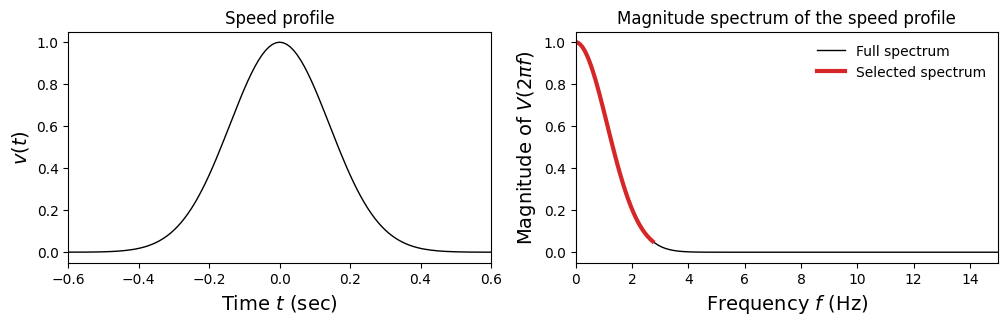

In [5]:
sparc_smooth1, (f, Mf), (f_sel, Mf_sel) = quality.smoothness.sparc(move1, fs=fs)

print(f"SPARC Smoothness: {sparc_smooth1:5.3f}")
# Visualize the 2nd adn 3rd return values
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(121)
ax.plot(t1, move1, color="k", lw=1)
ax.set_xlim(-0.6, 0.6)
ax.set_xlabel("Time $t$ (sec)", fontsize=14)
ax.set_ylabel("$v(t)$", fontsize=14)
ax.set_title("Speed profile")
# ax.legend(loc=1, frameon=False)
ax = fig.add_subplot(122)
ax.plot(f, Mf, color="k", lw=1, label="Full spectrum")
ax.plot(f_sel, Mf_sel, color="tab:red", lw=3, label="Selected spectrum")
ax.set_xlim(0, 15)
ax.set_xlabel("Frequency $f$ (Hz)", fontsize=14)
ax.set_ylabel("Magnitude of $V(2\\pi f)$", fontsize=14)
ax.set_title("Magnitude spectrum of the speed profile")
ax.legend(loc=1, frameon=False);

Now let's look at the random movement.

SPARC Smoothness: -2.642


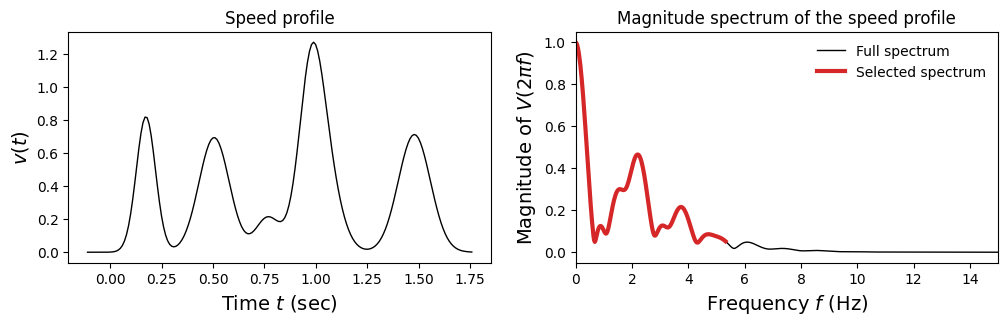

In [6]:
sparc_smooth2, (f, Mf), (f_sel, Mf_sel) = quality.smoothness.sparc(move2, fs=fs)

print(f"SPARC Smoothness: {sparc_smooth2:5.3f}")
# Visualize the 2nd adn 3rd return values
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(121)
ax.plot(t2, move2, color="k", lw=1)
# ax.set_xlim(-0.6, 0.6)
ax.set_xlabel("Time $t$ (sec)", fontsize=14)
ax.set_ylabel("$v(t)$", fontsize=14)
ax.set_title("Speed profile")
# ax.legend(loc=1, frameon=False)
ax = fig.add_subplot(122)
ax.plot(f, Mf, color="k", lw=1, label="Full spectrum")
ax.plot(f_sel, Mf_sel, color="tab:red", lw=3, label="Selected spectrum")
ax.set_xlim(0, 15)
ax.set_xlabel("Frequency $f$ (Hz)", fontsize=14)
ax.set_ylabel("Magnitude of $V(2\\pi f)$", fontsize=14)
ax.set_title("Magnitude spectrum of the speed profile")
ax.legend(loc=1, frameon=False);

### 1.2 LDLJ - Log Dimensionless Jerk

The `log_dimensionless_jerk` function retuns the smoothness value of a movement for the given velocity profile. The function returns a single value which is the estimate of the smoothness of the given movement.

If one is interested in knowing the individual factors correspond t9o the time scaling factor, amplitude scaling factor, and the integral of the norm2-squared jerk, then we can use the function, `log_dimensionless_jerk_factors` function.

In [7]:
ldlj_smooth1 = quality.smoothness.log_dimensionless_jerk(move1, fs=fs, data_type="vel")
time_factor, amp_factor, jerk_factor = quality.smoothness.log_dimensionless_jerk_factors(move1, fs=fs, data_type="vel")
print(f"LDLJ Smoothness: {ldlj_smooth1:5.3f}")
print(f"LDLJ Smoothness Factors: {time_factor:5.3f}, {amp_factor:5.3f}, {jerk_factor:5.3f}")

LDLJ Smoothness: -8.230
LDLJ Smoothness Factors: -2.079, 0.000, -6.151
